In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [37]:
data=pd.read_csv("C:\\Users\\mm\\Desktop\\spam.csv",encoding='latin-1')

In [38]:
data.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [39]:
data=data.rename(columns={'v1':'target',"v2":"sentiment"})

In [40]:
data=data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [41]:
data.isna().sum()

target       0
sentiment    0
dtype: int64

In [42]:
data

,target,sentiment
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


<Axes: >

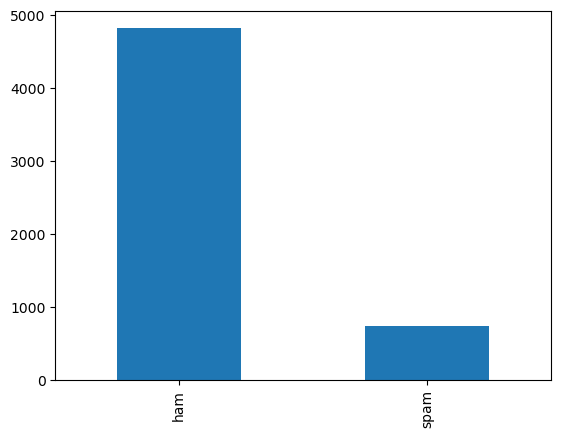

In [46]:
data['target'].value_counts().plot.bar()

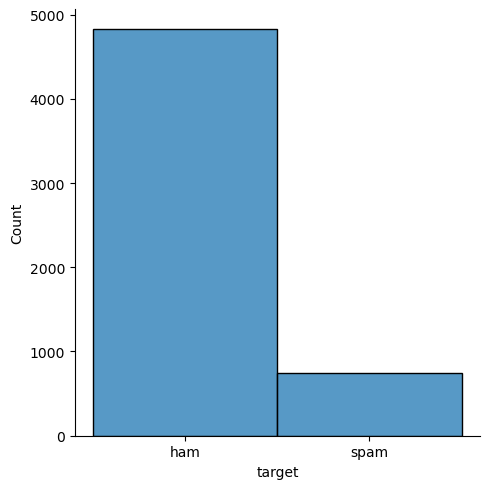

In [65]:
sns.displot(data['target'])

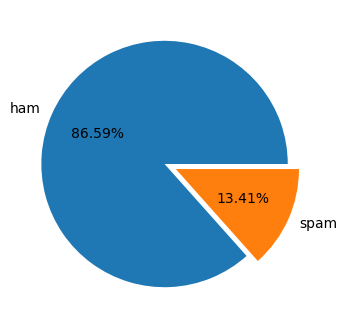

In [69]:
plt.figure(figsize=(4,4))
values = data['target'].value_counts()
plt.pie(values, labels=data['target'].unique(), autopct='%1.2f%%',startangle=0,explode=(0,0.1))
plt.show()

In [50]:
training_data=data["sentiment"]
testing_data=data["target"]

In [51]:
x_train,x_test,y_train,y_test=train_test_split(training_data,testing_data,test_size=0.2,random_state=42)

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [54]:
Tree=DecisionTreeClassifier()
Tree.fit(xv_train,y_train)

DecisionTreeClassifier()

In [55]:
Tree.score(xv_train,y_train)

1.0

In [56]:
logs=LogisticRegression()
logs.fit(xv_train,y_train)

LogisticRegression()

In [57]:
logs.score(xv_train,y_train)

0.9753197217859547

In [58]:
Boost=GradientBoostingClassifier(random_state=0)
Boost.fit(xv_train,y_train)

GradientBoostingClassifier(random_state=0)

In [59]:
Boost.score(xv_train,y_train)

0.9849674669059906